In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
df = pd.read_csv('car_purchasing.csv', encoding='latin1')

In [ ]:
df

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


In [ ]:
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [ ]:
df.tail()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353
499,Marla,Camaron.marla@hotmail.com,marlal,1,46.731152,61370.67766,9391.341628,462946.4924,45107.22566


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [ ]:
data = df.drop(columns=['customer name','customer e-mail'])

In [ ]:
df.isnull().sum()

,0
customer name,0
customer e-mail,0
country,0
gender,0
age,0
annual Salary,0
credit card debt,0
net worth,0
car purchase amount,0


In [ ]:
df.describe()


,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [ ]:
catergorical_columns=['gender','country']
for i in catergorical_columns:
  encoder=LabelEncoder()
  df[i]=encoder.fit_transform(df[i])


<Axes: >

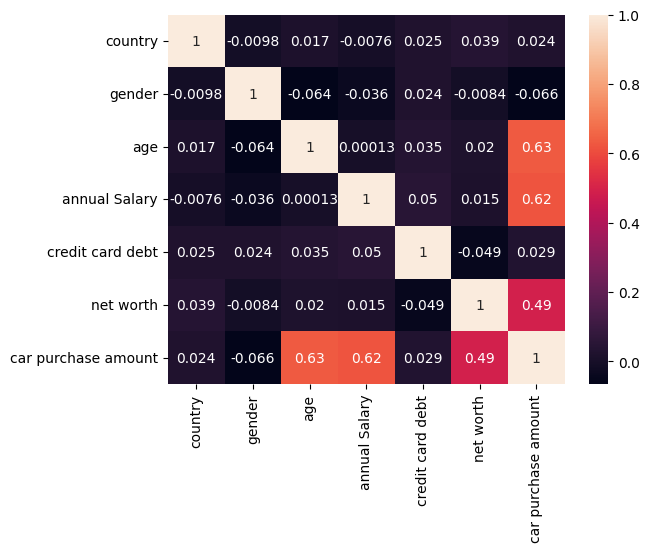

In [ ]:
numerical_df = df.select_dtypes(include=['number'])
sns.heatmap(numerical_df.corr(), annot=True)

In [ ]:
X = df[['annual Salary', 'credit card debt' , 'net worth']]
y = df['car purchase amount']

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=pd.DataFrame()
vif_data['feature']=X.columns
vif_data['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
print(vif_data)

            feature        VIF
0     annual Salary  10.845182
1  credit card debt   7.225009
2         net worth   6.104465


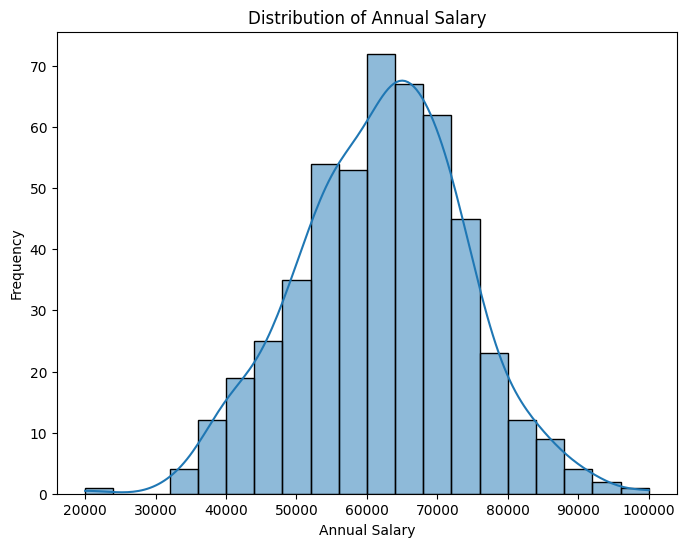

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['annual Salary'], bins=20, kde=True)
plt.title('Distribution of Annual Salary')
plt.xlabel('Annual Salary')
plt.ylabel('Frequency')
plt.show()


Normal Insights:
The distribution of annual salaries appears to be somewhat skewed to the right (positively skewed).
This suggests that most people fall within a certain salary range, with a smaller number of individuals having significantly higher salaries.
Hidden Insights:
There might be outliers or gaps in the distribution that indicate irregularities or specific income brackets.
Investigate potential reasons for these patterns.
Deep Insights:
The shape of the distribution can provide information about income inequality within the customer base.
Consider comparing the distribution to national or regional income statistics

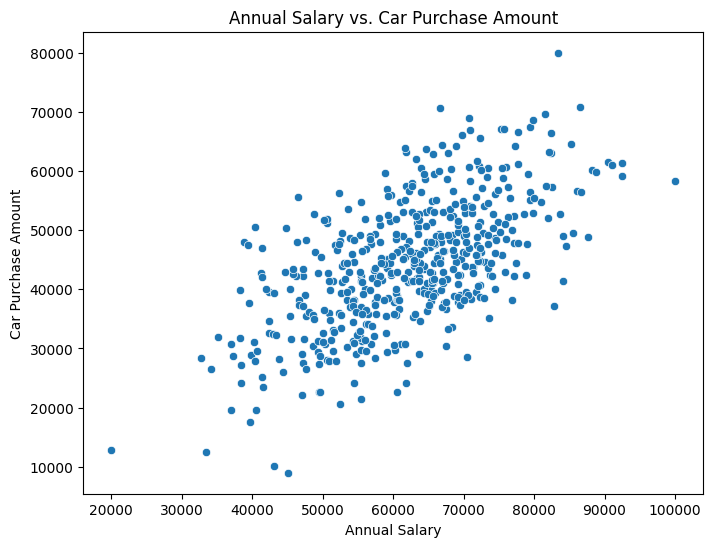

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='annual Salary', y='car purchase amount', data=df)
plt.title('Annual Salary vs. Car Purchase Amount')
plt.xlabel('Annual Salary')
plt.ylabel('Car Purchase Amount')
plt.show()

Normal Insights:
There's a positive correlation between annual salary and car purchase amount. People with higher salaries tend to purchase more expensive cars.
This is a general trend that is expected in most cases.
Hidden Insights:
There might be clusters of data points representing different car purchase behaviors or segments of customers.
Consider exploring clustering techniques to further analyze these segments.
Deep Insights:
The slope of the trend line might provide information about the elasticity of demand for cars.
Analyze how the slope varies for different salary ranges to understand purchase sensitivity.

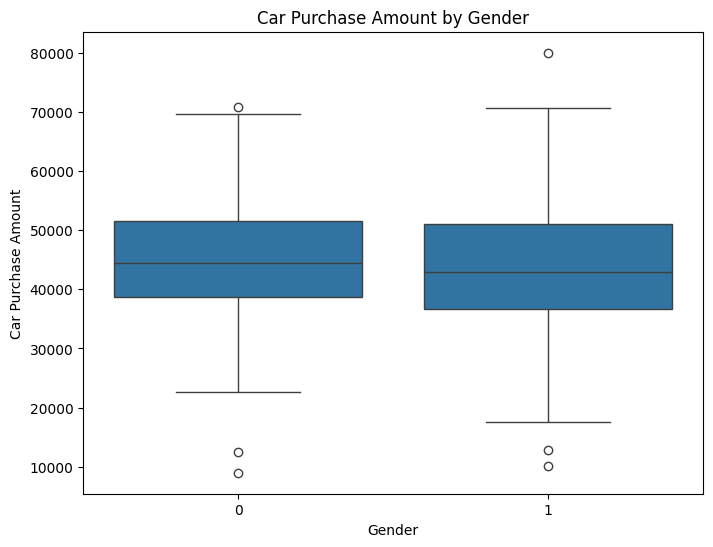

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='car purchase amount', data=df)
plt.title('Car Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Car Purchase Amount')
plt.show()

Normal Insights:
There might be a slight difference in the median car purchase amount between genders.
This suggests that one gender might tend to purchase slightly more expensive cars on average.
Hidden Insights:
The interquartile range (IQR) and outliers for each gender can reveal information about the variability of purchase amounts within each group.
Analyze if there are significant differences in variability.
Deep Insights:
Potential cultural or social factors might influence car purchase decisions based on gender.
Consider conducting further research or surveys to understand these factors.

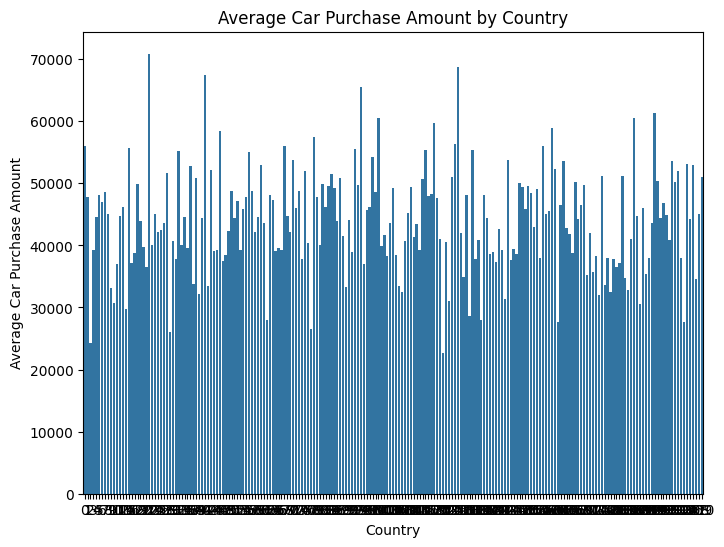

In [ ]:
country_avg_purchase = df.groupby('country')['car purchase amount'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='country', y='car purchase amount', data=country_avg_purchase)
plt.title('Average Car Purchase Amount by Country')
plt.xlabel('Country')
plt.ylabel('Average Car Purchase Amount')
plt.show()

Normal Insights:
Different countries exhibit varying average car purchase amounts.
This highlights regional differences in purchasing power or preferences.
Hidden Insights:
Consider economic factors or car market dynamics in each country to explain the observed patterns.
Research if specific car brands or models are more popular in certain countries.
Deep Insights:
Cultural or regulatory differences might influence car purchase decisions in different countries.
Investigate potential regulations or cultural norms that impact the car market.

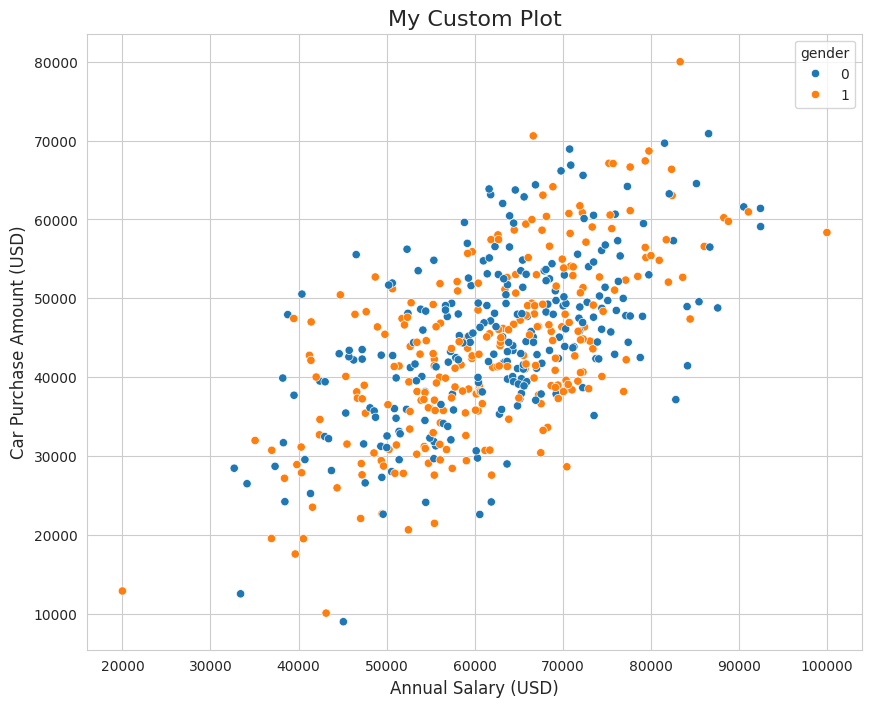

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))

sns.scatterplot(x='annual Salary', y='car purchase amount', hue='gender', data=df)

plt.title("My Custom Plot", fontsize=16)
plt.xlabel("Annual Salary (USD)", fontsize=12)
plt.ylabel("Car Purchase Amount (USD)", fontsize=12)
plt.savefig("my_plot.png", dpi=300)
plt.show()

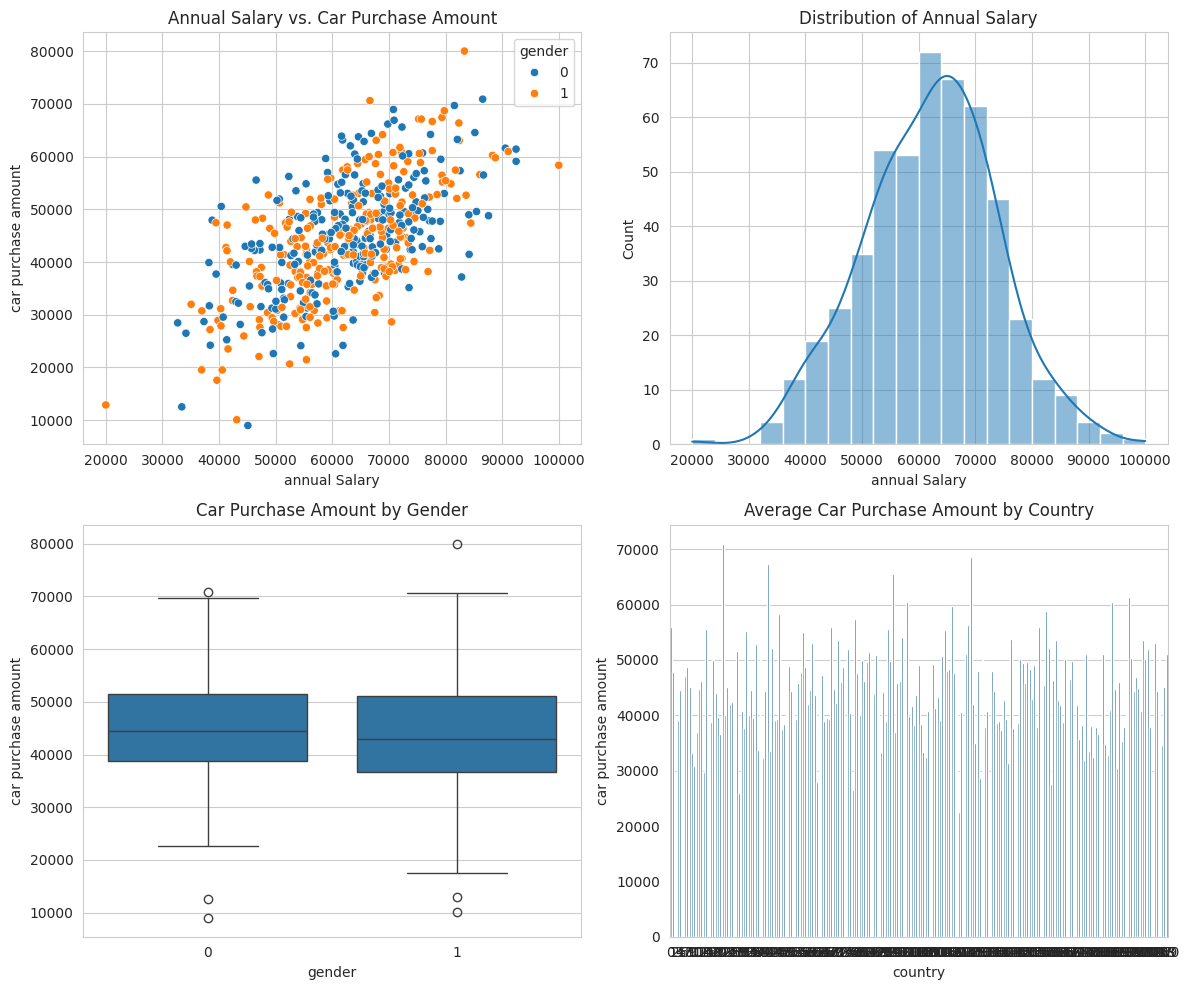

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)

sns.scatterplot(x='annual Salary', y='car purchase amount', hue='gender', data=df)
plt.title("Annual Salary vs. Car Purchase Amount")


plt.subplot(2, 2, 2)
sns.histplot(df['annual Salary'], bins=20, kde=True)
plt.title('Distribution of Annual Salary')


plt.subplot(2, 2, 3)
sns.boxplot(x='gender', y='car purchase amount', data=df)
plt.title('Car Purchase Amount by Gender')

country_avg_purchase = df.groupby('country')['car purchase amount'].mean().reset_index()
plt.subplot(2, 2, 4)
sns.barplot(x='country', y='car purchase amount', data=country_avg_purchase)
plt.title('Average Car Purchase Amount by Country')


plt.tight_layout()
plt.savefig("my_plot.png", dpi=300)
plt.show()

In [ ]:
import plotly.express as px
fig = px.scatter(df, x='annual Salary', y='car purchase amount', color='gender', hover_data=['country'])
fig.show()

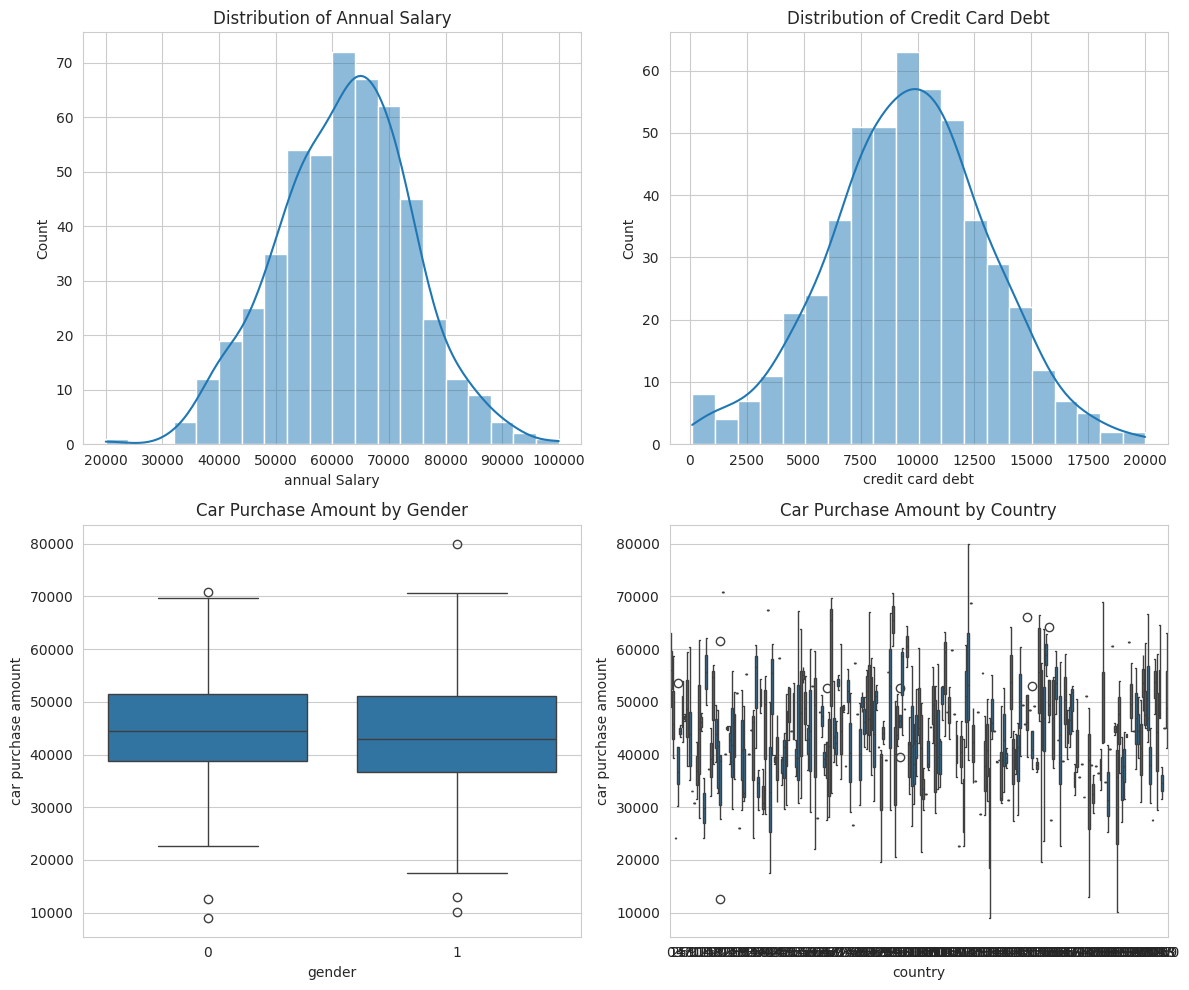

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.histplot(df['annual Salary'], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Distribution of Annual Salary")
sns.histplot(df['credit card debt'], bins=20, kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Distribution of Credit Card Debt")
sns.boxplot(x='gender', y='car purchase amount', data=df, ax=axes[1, 0])
axes[1, 0].set_title("Car Purchase Amount by Gender")
sns.boxplot(x='country', y='car purchase amount', data=df, ax=axes[1, 1])
axes[1, 1].set_title("Car Purchase Amount by Country")
plt.tight_layout()
plt.show()


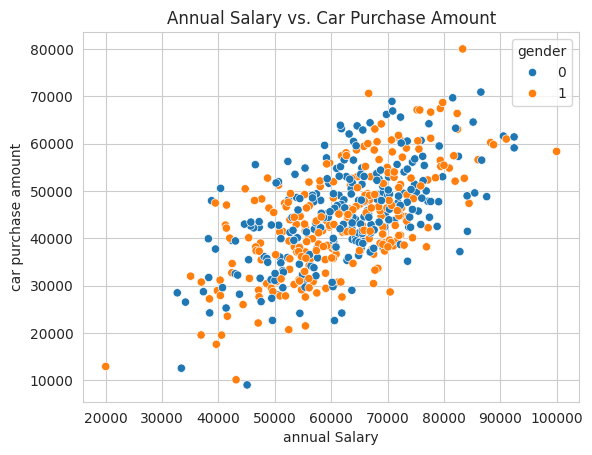

In [ ]:
sns.scatterplot(x='annual Salary', y='car purchase amount', hue='gender', data=df)
plt.title("Annual Salary vs. Car Purchase Amount")
plt.show()



Normal Insights:

Positive Correlation: There's a clear positive correlation between annual salary and car purchase amount. This means that as annual salary increases, the amount spent on car purchases also tends to increase. This is a common observation, as individuals with higher incomes generally have more disposable income to allocate towards larger purchases like cars.
Trend Line: A trend line (or regression line) can be added to the scatter plot to visualize the overall relationship. The slope of this line indicates the rate at which car purchase amount changes with respect to annual salary. A steeper slope suggests a stronger relationship, where a small increase in salary leads to a larger increase in car purchase amount.
Hidden Insights:

Customer Segmentation: Clusters or groupings of data points within the scatter plot might reveal different customer segments with distinct purchasing behaviors. For example, you might observe a cluster of high-income earners who spend a significant portion of their income on luxury cars, while another cluster might represent individuals with moderate incomes who prioritize affordability.
Outliers: Outliers, which are data points that deviate significantly from the general trend, can provide valuable insights. For instance, an outlier might represent an individual with a relatively low income who made a surprisingly large car purchase, or vice versa. Investigating these outliers can uncover unique circumstances or factors influencing purchasing decisions.
Deep Insights:

Elasticity of Demand: The slope of the trend line can provide insights into the elasticity of demand for cars. Elasticity refers to the responsiveness of car purchase amount to changes in income. A steeper slope indicates higher elasticity, meaning that car purchases are more sensitive to changes in income. This information can be useful for pricing strategies and market segmentation.
Predictive Modeling: The relationship between annual salary and car purchase amount can be used to build predictive models. These models can estimate car purchase amounts based on an individual's annual salary, which can be helpful for targeted marketing and sales efforts.
Market Dynamics: By analyzing the scatter plot over time or across different demographics, you can gain insights into how market dynamics, economic conditions, and consumer preferences influence car purchasing behavior.

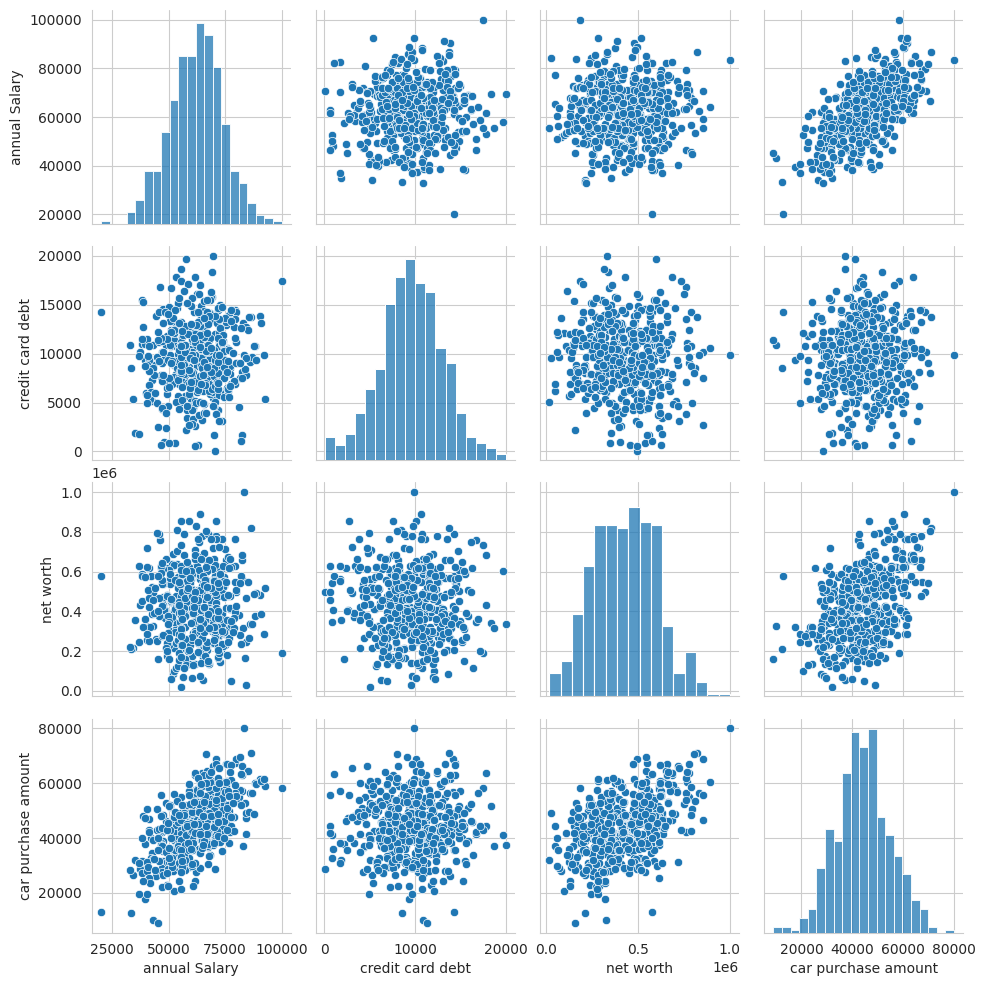

In [ ]:
sns.pairplot(df[['annual Salary', 'credit card debt', 'net worth', 'car purchase amount']])
plt.show()

In [ ]:

fig = px.scatter(df, x='annual Salary', y='car purchase amount', color='gender',
                 size='net worth', hover_data=['country', 'credit card debt'])
fig.update_layout(title="Interactive Exploration of Car Purchases")
fig.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:

y_pred = model.predict(X_test)


In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 42350161.96124286
R-squared: 0.6077713928939262


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

In [ ]:
df['debt_to_income_ratio'] = df['credit card debt'] / df['annual Salary']
df['age_group'] = pd.cut(df['age'], bins=[0, 30, 50, 70, 100], labels=['Young', 'Adult', 'Middle-aged', 'Senior'])

In [ ]:
df['salary_debt_interaction'] = df['annual Salary'] * df['credit card debt']

In [ ]:
X = df[['annual Salary', 'credit card debt' , 'net worth', 'salary_debt_interaction', 'debt_to_income_ratio', 'age_group']]
y = df['car purchase amount']

In [ ]:

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_pred = svr_model.predict(X_test)

knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

def evaluate_model(model_name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name}:")
    print(f"  Mean Squared Error: {mse}")
    print(f"  R-squared: {r2}")
    print("---")

evaluate_model("Decision Tree", y_test, dt_pred)
evaluate_model("Random Forest", y_test, rf_pred)
evaluate_model("XGBoost", y_test, xgb_pred)
evaluate_model("Linear Regression", y_test, lr_pred)
evaluate_model("Support Vector Regression", y_test, svr_pred)
evaluate_model("K-Nearest Neighbors", y_test, knn_pred)

Decision Tree:
  Mean Squared Error: 73498549.44289342
  R-squared: 0.3192887031061322
---
Random Forest:
  Mean Squared Error: 50924737.29067447
  R-squared: 0.5283574406859768
---
XGBoost:
  Mean Squared Error: 61578684.47784533
  R-squared: 0.4296852592376519
---
Linear Regression:
  Mean Squared Error: 42350161.96124286
  R-squared: 0.6077713928939262
---
Support Vector Regression:
  Mean Squared Error: 109612070.56474009
  R-squared: -0.015178874616019078
---
K-Nearest Neighbors:
  Mean Squared Error: 47817968.975783154
  R-squared: 0.5571309648549346
---


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_

y_pred = best_rf_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"Random Forest (Tuned): R-squared = {r2}")

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning:


405 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/uti

Random Forest (Tuned): R-squared = 0.568566367693156


In [ ]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

Ridge()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(
    estimator=KNeighborsRegressor(),
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_knn_model = grid_search.best_estimator_

y_pred = best_knn_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"K-Nearest Neighbors (Tuned): R-squared = {r2}")

K-Nearest Neighbors (Tuned): R-squared = 0.5246113828046912


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [0.1, 1.0, 10.0]
}

grid_search = GridSearchCV(
    estimator=Ridge(),
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_ridge_model = grid_search.best_estimator_

y_pred = best_ridge_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"Ridge Regression (Tuned): R-squared = {r2}")

Ridge Regression (Tuned): R-squared = 0.6077713928917094


In [ ]:
from sklearn.ensemble import StackingRegressor

estimators = [
    ('rf', RandomForestRegressor(random_state=42)),
    ('knn', KNeighborsRegressor()),
    ('lr', LinearRegression())
]

stacking_model = StackingRegressor(
    estimators=estimators,
    final_estimator=LinearRegression()
)

stacking_model.fit(X_train, y_train)

y_pred = stacking_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"Stacking Ensemble: R-squared = {r2}")

Stacking Ensemble: R-squared = 0.6153465376618478
